# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math

total_rounds = 10000
total_ads = 10
selected_ads = []
numbers_of_selections = [0] * total_ads
sum_of_rewards = [0] * total_ads
total_reward = 0

for round in range(total_rounds):
  ad = 0
  max_upper_bound = 0
  for i in range(total_ads):
    if numbers_of_selections[i] > 0:
      average_reward = sum_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(round + 1) / numbers_of_selections[i]) 
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  selected_ads.append(ad)
  numbers_of_selections[ad] += 1
  reward = data.values[round, ad]
  sum_of_rewards[ad] += reward
  total_reward += reward

## Visualising the results

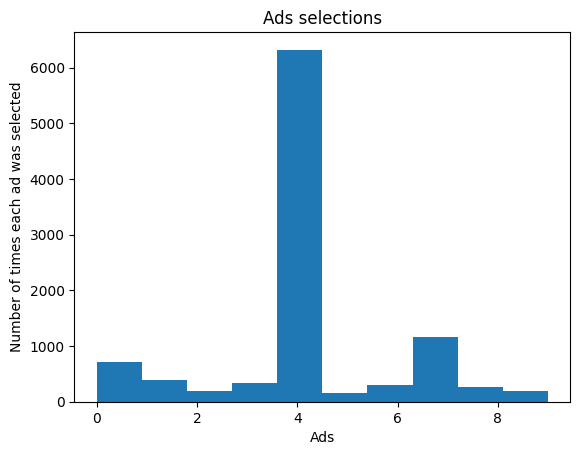

In [ ]:
plt.hist(selected_ads)
plt.title('Ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()